## Embedding
+ 워드 임베딩은 컴퓨터가 단어를 이해하고 효율적으로 처리할 수 있도록 단어를 벡터화하는 방법
+ 단어의 의미를 잘 표현해야하며, 현재까지도 많은 표현 방법들이 연구되는 중
+ 워드 임베딩을 거쳐 잘 표현된 단어벡터들은 계산이 가능하며, 모델 투입도 가능

### Encoding
+ 자연어를 컴퓨터가 이해할 수 있도록 숫자 등으로 변환하는 작업
+ 텍스트 처리에서는 주로 정수인코딩, 원핫인코딩 사용

In [3]:
#dictionary를 이용한 정수인코딩
text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'
tokens = [x for x in text.split(' ')]
unique = list(set(tokens))

token2index = {}
for i in range(len(unique)):
    token2index[unique[i]] = i
    
encode = [token2index[x] for x in tokens]
encode

[3, 2, 9, 6, 5, 4, 7, 1, 9, 8, 0]

In [4]:
#keras를 이용한 정수인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


In [5]:
#조건문, 반복문을 이용한 원핫인코딩
import numpy as np

one_hot = []
for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i]-1):
            temp.append(1)
        else:
            temp.append(0)
    one_hot.append(temp)
    
np.array(one_hot)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [6]:
#keras를 이용한 원핫인코딩
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### IMDB 데이터 사용해보기
+ Internet Movie DataBase
+ 긍정(1)/부정(0) 리뷰 5만개로 이루어진 데이터셋(훈련데이터 2.5만, 검증데이터 2.5만)

In [7]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

num_words = 1000   #등장빈도 순위 1000위까지의 단어만 사용(즉, 단어 집합의 크기가 1000)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((25000,), (25000,), (25000,), (25000,))

In [8]:
for i in range(3):
    if y_train[i] == 0:
        print('부정 =>', x_train[i])
    else:
        print('긍정 =>', x_train[i])

긍정 => [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
부정 => [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 

### 데이터 전처리
+ `pad_sequence()` : 모든 데이터를 같은 길이로 맞추기
    + maxlen 보다 길면 데이터를 자름
    + maxlen 보다 짧으면 부족한만큼 padding으로 채워넣음
        + `pre` : 데이터 앞을 채움
        + `post` : 데이터 뒤를 채움 
+ 모든 데이터가 같은 길이로 맞춰져야 `Embedding ` 레이어 사용 가능

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100
padded_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
padded_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

print(len(x_train[0]), '=>', len(padded_x_train[0]))
print(len(x_test[0]), '=>', len(padded_x_test[0]))

218 => 100
68 => 100


In [10]:
#모델 구성
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    Flatten(),
                    Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           32000     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3201      
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [11]:
#컴파일, 학습
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(padded_x_train, y_train,
                    epochs=10, verbose=0,
                    batch_size=32,
                    validation_split=0.2)

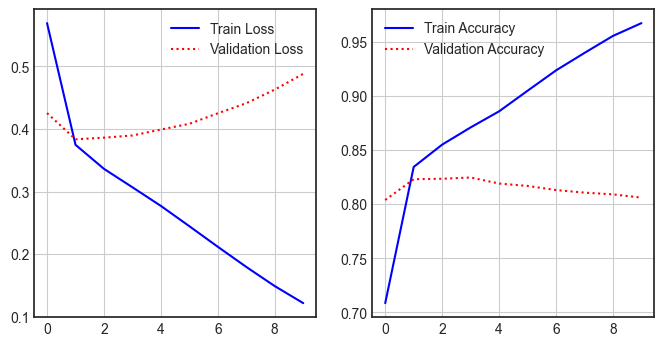

In [12]:
#시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [13]:
#평가
model.evaluate(padded_x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4885726807403564, 0.80288]

+ num_words 값을 키우면 모델 성능이 조금 더 향상될 것
+ 그러나 과적합 문제는 피할 수 없는데, 그 이유는
    + 단어간 관계나 문장구조 등 의미적 연결을 고려하지 않음  
    => 시퀀스 전체를 고려한 특성을 학습하기 위해 `Embedding`층 위해 `RNN`층이나 `1D 합성곱` 추가 가능  
    => 8, 9번 문서로 가시오

### Word2Vec
+ 분류 등과 같이 별도의 레이블 없이 텍스트 자체만으로도 학습 가능
+ 주변 단어와의 관계를 이용하는 방법
1. CBOW(continuous bag of words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측
2. Skip-gram
    - 대상단어의 임베딩으로 주변단어를 예측
    + 일반적으로 CBOW보다 성능이 좋은 편이나, 한번에 여러 단어를 예측하기 때문에 비효율적
    + 최근에는 negative sampling이라는 방법 사용

### TSNE(t-stochastic neighbor embedding)
+ 고차원 벡터들의 구조를 보존하며 저차원으로 사상하는 차원축소 알고리즘
+ 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 많이 사용됨

In [14]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(shuffle=True, random_state=2,
                          remove=('headers', 'footers', 'quotes'))
docs = data.data

print(len(docs))
docs[0]

11314


"Something about how Koresh had threatened to cause local \nproblems with all these wepaons he had and was alleged to\nhave.  \n\nSomeone else will post more details soon, I'm sure.\n\nOther News:\nSniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect\nwas disgruntled employee of Universal Studios, which\nis a division of M.C.A.\n\n\nQUESTION:\nWhat will Californians do with all those guns after the Reginald\ndenny trial?"

In [15]:
#전처리
import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt')

def clean_text(d):     #알파벳과 공백문자가 아닌 텍스트 삭제
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    result = ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w)>3])
    return result

def tokenize(d):   #빈칸 기준으로 단어를 나누는 토큰화
    return word_tokenize(d)

In [16]:
import pandas as pd

news_df = pd.DataFrame({'article':docs})
print(len(news_df))

news_df.replace('', float('NaN'), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))
print(news_df.head(2))

news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
print(news_df.head(2))

11314
11096
                                             article
0  Something about how Koresh had threatened to c...
1  I have an Okidata 2410 printer for which I wou...
                                             article
0  something koresh threatened cause local proble...
1  okidata printer would like printer driver anyo...


In [17]:
tokenized_df = news_df['article'].apply(tokenize)
tokenized_list = tokenized_df.to_list()

len(tokenized_list[0])

31

In [18]:
tokenized_df = news_df['article'].apply(tokenize)
tokenized_list = tokenized_df.to_list()

len(tokenized_list[0])

31

In [19]:
import numpy as np

drop_news = [i for i, sentence in enumerate(tokenized_list) if len(sentence)<=1]
news_text = np.delete(tokenized_list, drop_news, axis=0)

print(len(news_text))

10939


c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


### Gensim을 이용한 Word2Vec
#### 1. CBOW

In [20]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=news_text, 
                 window=3,     #Maximum distance between the current and predicted word within a sentence
                 size=100,     #Dimensionality of the word vectors
                 min_count=5,  #Ignores all words with total frequency lower than this
                 workers=4,    #Use these many worker threads to train the model (=faster training with multicore machines).
                 sg=0)         #1 for skip-gram; otherwise CBOW.

In [21]:
model.wv.most_similar(positive=['soldiers'])

[('turkey', 0.9947875738143921),
 ('turks', 0.9894453287124634),
 ('henrik', 0.9852364659309387),
 ('muslim', 0.9832826256752014),
 ('genocide', 0.9786258935928345),
 ('population', 0.9765007495880127),
 ('armenia', 0.9758992195129395),
 ('land', 0.971352219581604),
 ('police', 0.9705694317817688),
 ('murdered', 0.9702969193458557)]

#### 2. Skip-gram

In [22]:
model = Word2Vec(sentences=news_text, 
                 window=3, size=100,    
                 min_count=5, workers=4, sg=1)    #1 for skip-gram; otherwise CBOW.

model.wv.most_similar(positive=['soldiers'])

[('murdered', 0.9543147087097168),
 ('burned', 0.9522644281387329),
 ('azeri', 0.9485586881637573),
 ('wounded', 0.9456380605697632),
 ('attacked', 0.9376185536384583),
 ('massacre', 0.9372969269752502),
 ('girls', 0.9366248250007629),
 ('azerbaijanis', 0.9347703456878662),
 ('corpses', 0.9334537386894226),
 ('azeris', 0.9325055480003357)]

### 임베딩 벡터 시각화
+ https://projector.tensorflow.org/ 
+ 텐서보드 embedding projector를 사용하여 고차원 임베딩을 시각화


In [23]:
from gensim.models import KeyedVectors

#metadata.tsv와 tensor.tsv 데이터 생성
model.wv.save_word2vec_format('news_w2v')  #Store the input-hidden weight matrix in the same format used by the original C word2vec-tool, for compatibility.
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

2022-09-26 23:02:48,363 - word2vec2tensor - INFO - running c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\gensim\scripts\word2vec2tensor.py -i news_w2v -o news_w2v
2022-09-26 23:02:48,363 - utils_any2vec - INFO - loading projection weights from news_w2v
2022-09-26 23:02:49,055 - utils_any2vec - INFO - loaded (16996, 100) matrix from news_w2v
2022-09-26 23:02:49,884 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2022-09-26 23:02:49,884 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2022-09-26 23:02:49,885 - word2vec2tensor - INFO - finished running word2vec2tensor.py
